                                ASSIGNMENT NEURAL NETWORK - AADISH

                Part 1 - Data fetching and understand the train/val/test splits.

                        Load Dataset and Libraries

In [1]:
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf 

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization, Dropout
from keras import regularizers
tf.reset_default_graph()

Using TensorFlow backend.


In [2]:
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

In [3]:
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]

h5f.close()

In [4]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0
print (X_train.shape)
print (y_train1.shape)
print (X_test.shape)
print (y_test1.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


In [5]:
# 0-9 classes which seems to be equally distributed along the datasets
import numpy as np
print('train set classes')
print(np.unique(y_train1, return_index=False, return_inverse=False, return_counts=True, axis=None))
print('test set classes')
print(np.unique(y_test1, return_index=False, return_inverse=False, return_counts=True, axis=None))


train set classes
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([4186, 4172, 4197, 4281, 4188, 4232, 4168, 4192, 4188, 4196]))
test set classes
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1814, 1828, 1803, 1719, 1812, 1768, 1832, 1808, 1812, 1804]))


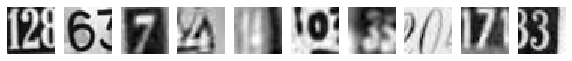

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train1[0:10]))

                                Data Pre-processing

In [7]:
# reshaping X data: (n, 3224, 32) => (n, 10)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print(X_train.shape)
print(X_test.shape)


(42000, 1024)
(18000, 1024)


In [8]:
# One Hot Encoding of target Variable
y_train1 = to_categorical(y_train1)
y_test1 = to_categorical(y_test1)
print(y_train1.shape)
print(y_test1.shape)

(42000, 10)
(18000, 10)


     Part2 - Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations)

                                            Basic NN model

In [9]:
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Flatten

In [10]:
model = Sequential()

In [11]:
model.add(Dense(200, input_shape = (1024, ), kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(100, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(60, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(30, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(10, kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [12]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(X_train, y_train1, batch_size = 32, epochs = 10, verbose = 1)


Epoch 1/10
42000/42000 [==============================] - 7s 155us/step - loss: 2.2433 - accuracy: 0.1597
Epoch 2/10
42000/42000 [==============================] - 6s 146us/step - loss: 1.9090 - accuracy: 0.3434
Epoch 3/10
42000/42000 [==============================] - 6s 147us/step - loss: 1.5302 - accuracy: 0.4991
Epoch 4/10
42000/42000 [==============================] - 6s 149us/step - loss: 1.3295 - accuracy: 0.5744
Epoch 5/10
42000/42000 [==============================] - 7s 156us/step - loss: 1.2189 - accuracy: 0.6139
Epoch 6/10
42000/42000 [==============================] - 7s 161us/step - loss: 1.1351 - accuracy: 0.6431
Epoch 7/10
42000/42000 [==============================] - 7s 165us/step - loss: 1.0727 - accuracy: 0.6657
Epoch 8/10
42000/42000 [==============================] - 7s 168us/step - loss: 1.0265 - accuracy: 0.6806
Epoch 9/10
42000/42000 [==============================] - 7s 171us/step - loss: 0.9873 - accuracy: 0.6926
Epoch 10/10
42000/42000 [====================

In [14]:
results = model.evaluate(X_test, y_test1)

18000/18000 [==============================] - 1s 60us/step


In [15]:
print('Test accuracy: ', results[1])

Test accuracy:  0.6268333196640015


            Part 3 - Implement batch normalization for training the neural network

In [ ]:
tf.reset_default_graph()

In [17]:
def BatchNorm_model():
    model = Sequential()
    
    model.add(Dense(200, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))
    model.add(Dense(60, kernel_initializer='he_normal'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))
    model.add(Dense(30, kernel_initializer='he_normal'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [18]:
model = BatchNorm_model()
history = model.fit(X_train, y_train1, batch_size = 32, epochs = 10, verbose = 1)

Epoch 1/10
42000/42000 [==============================] - 18s 418us/step - loss: 1.8816 - accuracy: 0.3501
Epoch 2/10
42000/42000 [==============================] - 16s 375us/step - loss: 1.3144 - accuracy: 0.5748
Epoch 3/10
42000/42000 [==============================] - 16s 375us/step - loss: 1.1130 - accuracy: 0.6438
Epoch 4/10
42000/42000 [==============================] - 16s 374us/step - loss: 1.0179 - accuracy: 0.6759
Epoch 5/10
42000/42000 [==============================] - 16s 380us/step - loss: 0.9419 - accuracy: 0.6998
Epoch 6/10
42000/42000 [==============================] - 16s 381us/step - loss: 0.8829 - accuracy: 0.7185
Epoch 7/10
42000/42000 [==============================] - 16s 381us/step - loss: 0.8406 - accuracy: 0.7341
Epoch 8/10
42000/42000 [==============================] - 17s 394us/step - loss: 0.7991 - accuracy: 0.7455
Epoch 9/10
42000/42000 [==============================] - 1624s 39ms/step - loss: 0.7708 - accuracy: 0.7525
Epoch 10/10
42000/42000 [===========

In [19]:
results = model.evaluate(X_test, y_test1)

18000/18000 [==============================] - 2s 110us/step


In [20]:
print('Test accuracy: ', results[1])

Test accuracy:  0.5246666669845581


                                Adding dropout normatisation

In [22]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(200, input_shape = (1024, ), kernel_initializer='he_normal', name='Layer_1'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
 #  model.add(Dropout(0.4))
    model.add(Dense(100, kernel_initializer='he_normal',name='Layer_2'))
#   model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.4))
    model.add(Dense(60, kernel_initializer='he_normal',name='Layer_3'))
 #  model.add(BatchNormalization())
    model.add(Activation('relu'))
  # model.add(Dropout(0.4))
    model.add(Dense(30, kernel_initializer='he_normal', name='Layer_4'))
#   model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, kernel_initializer='he_normal', name='Layer_5'))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [23]:
tf.reset_default_graph()
model = mlp_model()
history = model.fit(X_train, y_train1, batch_size = 32, epochs = 10, verbose = 1)

Epoch 1/10
42000/42000 [==============================] - 24s 570us/step - loss: 1.9800 - accuracy: 0.2675
Epoch 2/10
42000/42000 [==============================] - 24s 569us/step - loss: 1.5258 - accuracy: 0.4843
Epoch 3/10
42000/42000 [==============================] - 25s 592us/step - loss: 1.3306 - accuracy: 0.5665
Epoch 4/10
42000/42000 [==============================] - 26s 618us/step - loss: 1.2230 - accuracy: 0.6114
Epoch 5/10
42000/42000 [==============================] - 23s 545us/step - loss: 1.1521 - accuracy: 0.6393
Epoch 6/10
42000/42000 [==============================] - 23s 548us/step - loss: 1.0945 - accuracy: 0.6611
Epoch 7/10
42000/42000 [==============================] - 23s 553us/step - loss: 1.0449 - accuracy: 0.6718
Epoch 8/10
42000/42000 [==============================] - 24s 560us/step - loss: 1.0123 - accuracy: 0.6886
Epoch 9/10
42000/42000 [==============================] - 23s 559us/step - loss: 0.9669 - accuracy: 0.7018
Epoch 10/10
42000/42000 [============

In [24]:
results = model.evaluate(X_test, y_test1)

18000/18000 [==============================] - 2s 94us/step


In [25]:
print('Test accuracy: ', results[1])

Test accuracy:  0.6391111016273499


                                    HyperParameter Tuning

In [27]:
tf.reset_default_graph()
def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr

    model = Sequential()
    
    model.add(Dense(200, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(100, kernel_initializer='he_normal'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))
    model.add(Dense(60, kernel_initializer='he_normal'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))
    model.add(Dense(30, kernel_initializer='he_normal'))
    model.add(BatchNormalization()) 
    model.add(Activation('relu'))
    model.add(Dense(10, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(Lambda)))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(optimizer=sgd,loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train1, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(X_train, y_train1, verbose=0)
    
    return score

In [28]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    best_acc = train_and_test_loop(50, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/50
42000/42000 [==============================] - 6s 145us/step - loss: 1.8819 - accuracy: 0.3706
Epoch 2/50
42000/42000 [==============================] - 3s 80us/step - loss: 1.1171 - accuracy: 0.6443
Epoch 3/50
42000/42000 [==============================] - 3s 79us/step - loss: 0.9031 - accuracy: 0.7176
Epoch 4/50
42000/42000 [==============================] - 3s 80us/step - loss: 0.7793 - accuracy: 0.7588
Epoch 5/50
42000/42000 [==============================] - 3s 79us/step - loss: 0.7192 - accuracy: 0.7776
Epoch 6/50
42000/42000 [==============================] - 3s 79us/step - loss: 0.6518 - accuracy: 0.8010
Epoch 7/50
42000/42000 [==============================] - 3s 80us/step - loss: 0.6122 - accuracy: 0.8130
Epoch 8/50
42000/42000 [==============================] - 3s 80us/step - loss: 0.5716 - accuracy: 0.8258
Epoch 9/50
42000/42000 [==============================] - 3s 80us/step - loss: 0.5468 - accuracy: 0.8332
Epoch 10/50
42000/42000 [=============================

42000/42000 [==============================] - 3s 79us/step - loss: 1.3507 - accuracy: 0.5983
Epoch 28/50
42000/42000 [==============================] - 3s 79us/step - loss: 1.3276 - accuracy: 0.6064
Epoch 29/50
42000/42000 [==============================] - 3s 79us/step - loss: 1.3061 - accuracy: 0.6131
Epoch 30/50
42000/42000 [==============================] - 3s 79us/step - loss: 1.2857 - accuracy: 0.6201
Epoch 31/50
42000/42000 [==============================] - 3s 79us/step - loss: 1.2644 - accuracy: 0.6243
Epoch 32/50
42000/42000 [==============================] - 3s 79us/step - loss: 1.2446 - accuracy: 0.6323
Epoch 33/50
42000/42000 [==============================] - 3s 79us/step - loss: 1.2249 - accuracy: 0.6384
Epoch 34/50
42000/42000 [==============================] - 3s 79us/step - loss: 1.2070 - accuracy: 0.6444
Epoch 35/50
42000/42000 [==============================] - 3s 79us/step - loss: 1.1893 - accuracy: 0.6483
Epoch 36/50
42000/42000 [==============================] -

42000/42000 [==============================] - 3s 79us/step - loss: 2.0447 - accuracy: 0.2846
Epoch 3/50
42000/42000 [==============================] - 3s 79us/step - loss: 1.7868 - accuracy: 0.4156
Epoch 4/50
42000/42000 [==============================] - 3s 79us/step - loss: 1.5752 - accuracy: 0.5049
Epoch 5/50
42000/42000 [==============================] - 3s 79us/step - loss: 1.4089 - accuracy: 0.5670
Epoch 6/50
42000/42000 [==============================] - 3s 79us/step - loss: 1.2793 - accuracy: 0.6110
Epoch 7/50
42000/42000 [==============================] - 3s 80us/step - loss: 1.1745 - accuracy: 0.6463
Epoch 8/50
42000/42000 [==============================] - 3s 80us/step - loss: 1.0859 - accuracy: 0.6751
Epoch 9/50
42000/42000 [==============================] - 3s 81us/step - loss: 1.0124 - accuracy: 0.6974
Epoch 10/50
42000/42000 [==============================] - 4s 89us/step - loss: 0.9532 - accuracy: 0.7126
Epoch 11/50
42000/42000 [==============================] - 4s 90u

42000/42000 [==============================] - 4s 99us/step - loss: 1.8596 - accuracy: 0.4142
Epoch 29/50
42000/42000 [==============================] - 5s 125us/step - loss: 1.8434 - accuracy: 0.4226
Epoch 30/50
42000/42000 [==============================] - 4s 105us/step - loss: 1.8290 - accuracy: 0.4305
Epoch 31/50
42000/42000 [==============================] - 4s 107us/step - loss: 1.8142 - accuracy: 0.4374
Epoch 32/50
42000/42000 [==============================] - 4s 101us/step - loss: 1.7995 - accuracy: 0.4440
Epoch 33/50
42000/42000 [==============================] - 4s 103us/step - loss: 1.7847 - accuracy: 0.4520
Epoch 34/50
42000/42000 [==============================] - 4s 93us/step - loss: 1.7708 - accuracy: 0.4580
Epoch 35/50
42000/42000 [==============================] - 4s 99us/step - loss: 1.7563 - accuracy: 0.4636
Epoch 36/50
42000/42000 [==============================] - 4s 85us/step - loss: 1.7420 - accuracy: 0.4699
Epoch 37/50
42000/42000 [============================

42000/42000 [==============================] - 3s 81us/step - loss: 1.8017 - accuracy: 0.4249
Epoch 4/50
42000/42000 [==============================] - 3s 80us/step - loss: 1.6040 - accuracy: 0.5139
Epoch 5/50
42000/42000 [==============================] - 3s 80us/step - loss: 1.4402 - accuracy: 0.5775
Epoch 6/50
42000/42000 [==============================] - 3s 81us/step - loss: 1.3028 - accuracy: 0.6199
Epoch 7/50
42000/42000 [==============================] - 3s 80us/step - loss: 1.1906 - accuracy: 0.6521
Epoch 8/50
42000/42000 [==============================] - 3s 80us/step - loss: 1.1021 - accuracy: 0.6767
Epoch 9/50
42000/42000 [==============================] - 3s 81us/step - loss: 1.0268 - accuracy: 0.6975
Epoch 10/50
42000/42000 [==============================] - 3s 82us/step - loss: 0.9686 - accuracy: 0.7116
Epoch 11/50
42000/42000 [==============================] - 4s 84us/step - loss: 0.9135 - accuracy: 0.7283
Epoch 12/50
42000/42000 [==============================] - 4s 86

42000/42000 [==============================] - 1102s 26ms/step - loss: 1.3194 - accuracy: 0.6655
Epoch 30/50
42000/42000 [==============================] - 3s 78us/step - loss: 1.2999 - accuracy: 0.6713
Epoch 31/50
42000/42000 [==============================] - 4s 85us/step - loss: 1.2824 - accuracy: 0.6763
Epoch 32/50
42000/42000 [==============================] - 4s 88us/step - loss: 1.2635 - accuracy: 0.6809
Epoch 33/50
42000/42000 [==============================] - 3s 78us/step - loss: 1.2472 - accuracy: 0.6862
Epoch 34/50
42000/42000 [==============================] - 3s 71us/step - loss: 1.2299 - accuracy: 0.6911
Epoch 35/50
42000/42000 [==============================] - 3s 78us/step - loss: 1.2156 - accuracy: 0.6964
Epoch 36/50
42000/42000 [==============================] - 3s 66us/step - loss: 1.2010 - accuracy: 0.6991
Epoch 37/50
42000/42000 [==============================] - 3s 73us/step - loss: 1.1864 - accuracy: 0.7030
Epoch 38/50
42000/42000 [==============================

        Best Accuracy with learning rate 0.05 and L2 regulariser 0.0008

In [36]:

Lambda = 0.0008
learning_rate = 0.05
tf.reset_default_graph()
model = Sequential()
    
model.add(Dense(200, input_shape = (1024, ), kernel_initializer='he_normal'))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(100, kernel_initializer='he_normal'))
#model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(Dense(60, kernel_initializer='he_normal'))
#model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(Dense(30, kernel_initializer='he_normal'))
#model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(Dense(10, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(Lambda)))
model.add(Activation('softmax'))
    
sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
# Compile model
model.compile(optimizer=sgd,loss='categorical_crossentropy', metrics=['accuracy'])
    
# Fit the model
model.fit(X_train, y_train1, epochs=50, batch_size=1000, verbose= 1)

Epoch 1/50
42000/42000 [==============================] - 2s 46us/step - loss: 2.3292 - accuracy: 0.1038
Epoch 2/50
42000/42000 [==============================] - 1s 30us/step - loss: 2.3024 - accuracy: 0.1244
Epoch 3/50
42000/42000 [==============================] - 1s 32us/step - loss: 2.2654 - accuracy: 0.1562
Epoch 4/50
42000/42000 [==============================] - 1s 35us/step - loss: 2.1517 - accuracy: 0.1996
Epoch 5/50
42000/42000 [==============================] - 1s 28us/step - loss: 2.0925 - accuracy: 0.2180
Epoch 6/50
42000/42000 [==============================] - 1s 32us/step - loss: 1.8814 - accuracy: 0.3103
Epoch 7/50
42000/42000 [==============================] - 1s 23us/step - loss: 1.9448 - accuracy: 0.2813
Epoch 8/50
42000/42000 [==============================] - 1s 23us/step - loss: 1.9789 - accuracy: 0.2796
Epoch 9/50
42000/42000 [==============================] - 1s 35us/step - loss: 1.8466 - accuracy: 0.3396
Epoch 10/50
42000/42000 [==============================

In [37]:
result = model.evaluate(X_test, y_test1, verbose=0)
print('Test accuracy: ', result[1])

Test accuracy:  0.7702777981758118


                        Print the classification accuracy metrics

In [38]:
print(model.metrics_names)
print(result)   

['loss', 'accuracy']
[0.7572125926017761, 0.7702777981758118]


                                model summary

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 60)                6060      
_________________________________________________________________
activation_3 (Activation)    (None, 60)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)               